**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: LINETH DEL CARMEN GUERRA CAMARENA
*   MATRÍCULA: A01795639

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/data science"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [6]:
cars_df = cars_df.drop(columns =['id','VIN','url','image_url','description','posting_date','lat','long'])

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
cars_df = pd.DataFrame(data = cars_df)

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [9]:
cars_df.dropna(thresh=0.7*len(cars_df.columns))

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,NaN,al
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,NaN,al
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,NaN,al
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,NaN,al
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [10]:
cars_df.dropna(thresh=len(cars_df)*0.95, axis=1, inplace=True)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,wy


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [11]:
#visualizando el tipo de varaible para saber cual metodo de imputación es apropiado para cada variable
cars_df.dtypes

region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
state            object
dtype: object

In [12]:
#valores faltantes en las variables
cars_df.isnull().sum()

region              0
region_url          0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
state               0
dtype: int64

In [13]:
# Imputamos la variable con la media
cars_df['year'].fillna(cars_df['year'].mean(), inplace=True)
print("valores fatantes en year: " +
str(cars_df['year'].isnull().sum()))

# Calcular la moda de la variable
moda = cars_df['manufacturer'].mode().iloc[0]
# Imputar los valores vacíos con la moda
cars_df['manufacturer'].fillna(moda, inplace=True)
print("valores faltantes en manufacturer: " +
str(cars_df['manufacturer'].isnull().sum()))

#valores faltantes en model
moda = cars_df['model'].mode().iloc[0]
#imputar valores vacíos
cars_df['model'].fillna(moda, inplace=True)
print("valores faltantes en model: " +
str(cars_df['model'].isnull().sum()))

#valores faltantes
moda = cars_df['fuel'].mode().iloc[0]
#imputar valores vacíos
cars_df['fuel'].fillna(moda, inplace=True)
print("valores faltantes en fuel: " +
str(cars_df['fuel'].isnull().sum()))

# Imputamos la variable con la media
cars_df['odometer'].fillna(cars_df['odometer'].mean(), inplace=True)
print("valores fatantes en odometer: " +
str(cars_df['odometer'].isnull().sum()))

#valores faltantes
moda = cars_df['title_status'].mode().iloc[0]
#imputar valores vacíos
cars_df['title_status'].fillna(moda, inplace=True)
print("valores faltantes en title_status: " +
str(cars_df['title_status'].isnull().sum()))

#valores faltantes
moda = cars_df['transmission'].mode().iloc[0]
#imputar valores vacíos
cars_df['transmission'].fillna(moda, inplace=True)
print("valores faltantes en transmission: " +
str(cars_df['transmission'].isnull().sum()))

valores fatantes en year: 0
valores faltantes en manufacturer: 0
valores faltantes en model: 0
valores faltantes en fuel: 0
valores fatantes en odometer: 0
valores faltantes en title_status: 0
valores faltantes en transmission: 0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

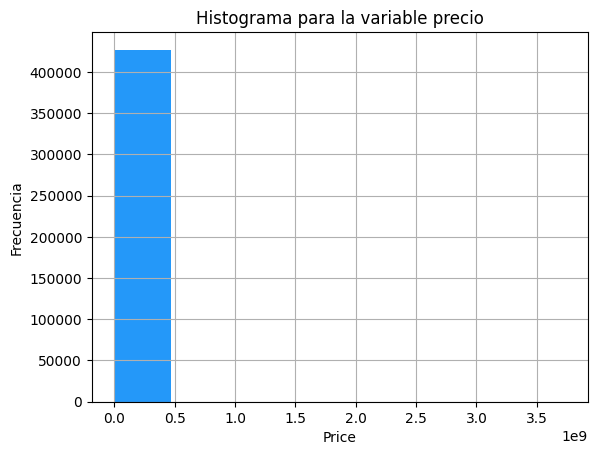

In [14]:
#histograma para la variable
cars_df['price'].hist(bins=8, color='#2498F9')
plt.title('Histograma para la variable precio')
plt.xlabel('Price')
plt.ylabel("Frecuencia")
plt.show()

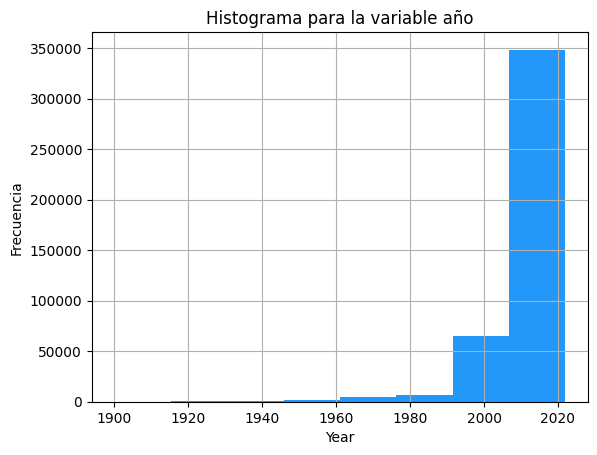

In [15]:
#histograma para la variable
cars_df['year'].hist(bins=8, color='#2498F9')
plt.title('Histograma para la variable año')
plt.xlabel('Year')
plt.ylabel("Frecuencia")
plt.show()

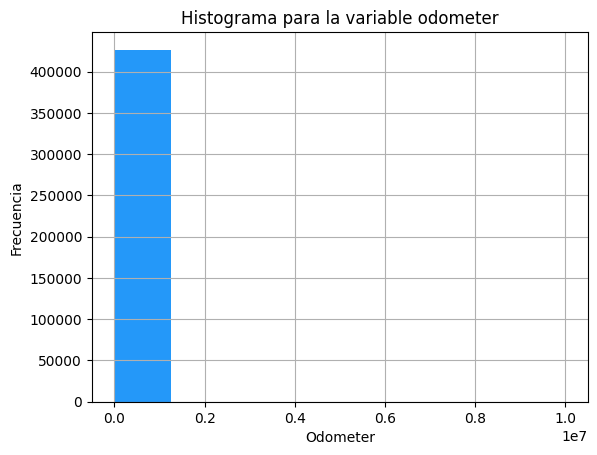

In [16]:
#histograma para la variable
cars_df['odometer'].hist(bins=8, color='#2498F9')
plt.title('Histograma para la variable odometer')
plt.xlabel('Odometer')
plt.ylabel("Frecuencia")
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [17]:
age = datetime.now().year - cars_df['year']

In [18]:
cars_df.insert(4,"age",age)
cars_df.drop(columns=['year'])

,region,region_url,price,age,manufacturer,model,fuel,odometer,title_status,transmission,state
0,prescott,https://prescott.craigslist.org,6000,12.764809,ford,f-150,gas,98043.331443,clean,automatic,az
1,fayetteville,https://fayar.craigslist.org,11900,12.764809,ford,f-150,gas,98043.331443,clean,automatic,ar
2,florida keys,https://keys.craigslist.org,21000,12.764809,ford,f-150,gas,98043.331443,clean,automatic,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,12.764809,ford,f-150,gas,98043.331443,clean,automatic,ma
4,greensboro,https://greensboro.craigslist.org,4900,12.764809,ford,f-150,gas,98043.331443,clean,automatic,nc
...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,5.000000,nissan,maxima s sedan 4d,gas,32226.000000,clean,other,wy
426876,wyoming,https://wyoming.craigslist.org,30590,4.000000,volvo,s60 t5 momentum sedan 4d,gas,12029.000000,clean,other,wy
426877,wyoming,https://wyoming.craigslist.org,34990,4.000000,cadillac,xt4 sport suv 4d,diesel,4174.000000,clean,other,wy
426878,wyoming,https://wyoming.craigslist.org,28990,6.000000,lexus,es 350 sedan 4d,gas,30112.000000,clean,other,wy


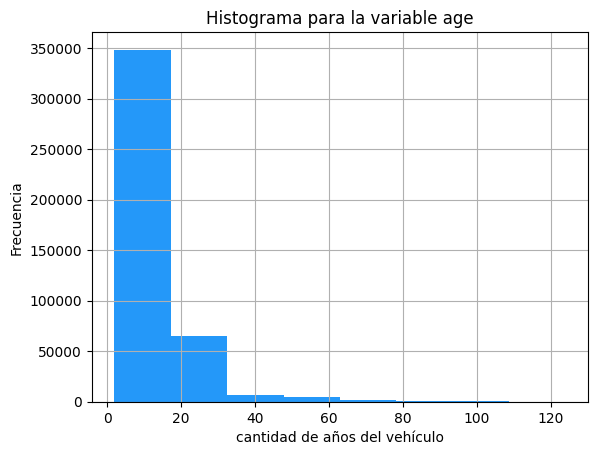

In [19]:
#histograma de la variable age
cars_df['age'].hist(bins=8, color='#2498F9')
plt.title('Histograma para la variable age')
plt.xlabel('cantidad de años del vehículo')
plt.ylabel("Frecuencia")
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

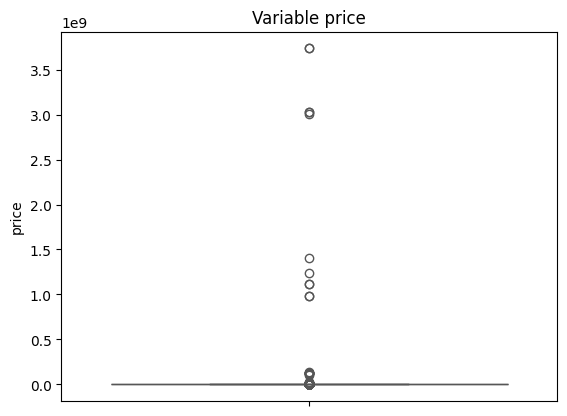

In [20]:
fig, ax = plt.subplots()
ax.set_title('Variable price')
valores = sns.boxplot(cars_df['price'], color='#2498F9');

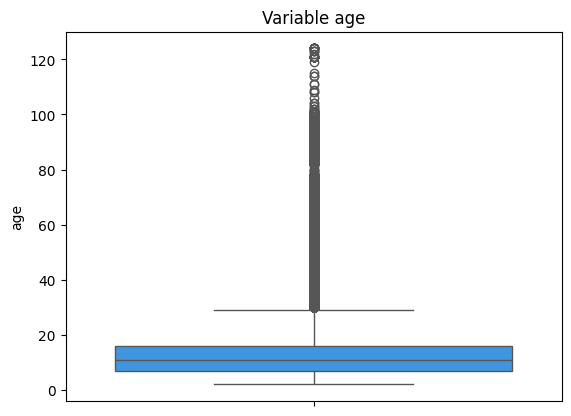

In [21]:

fig, ax = plt.subplots()
ax.set_title('Variable age')
valores = sns.boxplot(cars_df['age'], color='#2498F9');

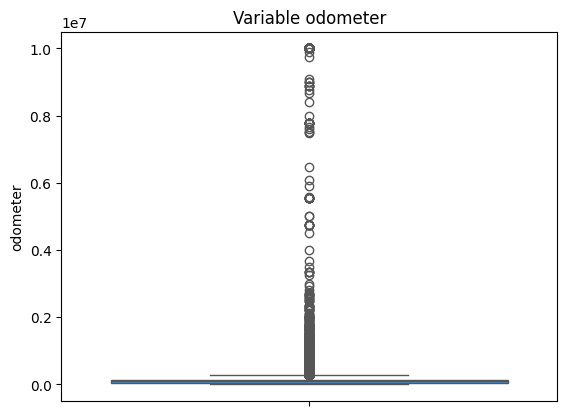

In [22]:
fig, ax = plt.subplots()
ax.set_title('Variable odometer')
valores = sns.boxplot(cars_df['odometer'], color='#2498F9');

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [192]:
number_of_rows = len(cars_df)
display(number_of_rows)
columns = ['price', 'age', 'odometer']

for column in columns:
    # Identificar valores atípicos por cuartiles
    Q1 = cars_df[column].quantile(0.25)
    Q3 = cars_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtrar valores atípicos
    outliers = cars_df[(cars_df[column] < Q1 - 1.5 * IQR) | (cars_df[column] > Q3 + 1.5 * IQR)]

    # Contar valores atípicos
    num_outliers = len(outliers)
    print(f"Número de valores atípicos en {column}: {num_outliers}")

    # Mostrar el DataFrame con valores atípicos
    print(f"DataFrame con valores atípicos en {column}:")
    print(outliers)

    # Eliminar valores atípicos del conjunto original
    cars_df = cars_df[~cars_df[column].isin(outliers[column])]

# Calcular el porcentaje de registros eliminados
number_of_rows = len(cars_df)
percentage_removed = ((number_of_rows - len(cars_df)) / number_of_rows) * 100
print(f"Porcentaje de registros eliminados: {percentage_removed}%")

399472

Número de valores atípicos en price: 491
DataFrame con valores atípicos en price:
                      region                         region_url  price  \
999               birmingham        https://bham.craigslist.org  56990   
3257    huntsville / decatur  https://huntsville.craigslist.org  56990   
4794              montgomery  https://montgomery.craigslist.org  57000   
6093      anchorage / mat-su   https://anchorage.craigslist.org  56995   
6288      anchorage / mat-su   https://anchorage.craigslist.org  56977   
...                      ...                                ...    ...   
419936               madison     https://madison.craigslist.org  56900   
426057                wausau      https://wausau.craigslist.org  56990   
426611               wyoming     https://wyoming.craigslist.org  56850   
426666               wyoming     https://wyoming.craigslist.org  56990   
426692               wyoming     https://wyoming.craigslist.org  56988   

          year  age   manufac

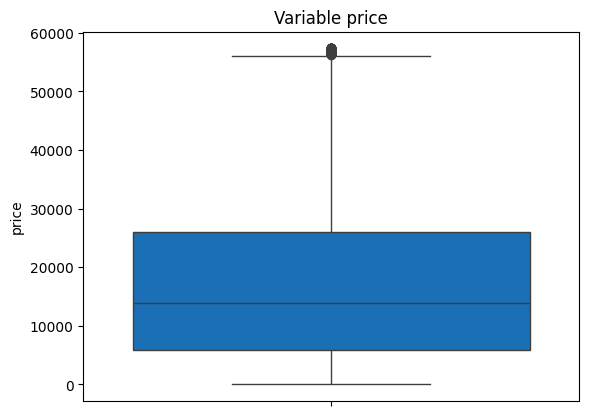

In [24]:
fig, ax = plt.subplots()
ax.set_title('Variable price')
valores = sns.boxplot(cars_df['price'], color='#0071CF');

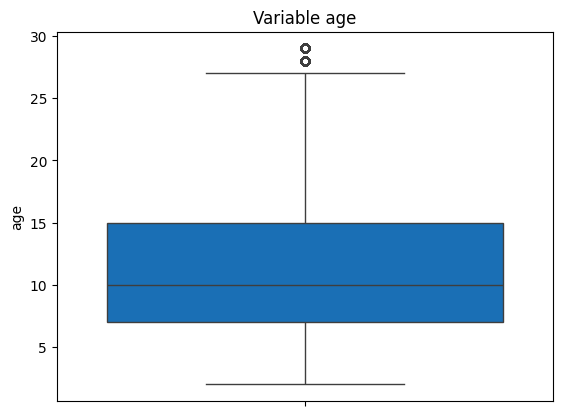

In [25]:
fig, ax = plt.subplots()
ax.set_title('Variable age')
valores = sns.boxplot(cars_df['age'], color='#0071CF');

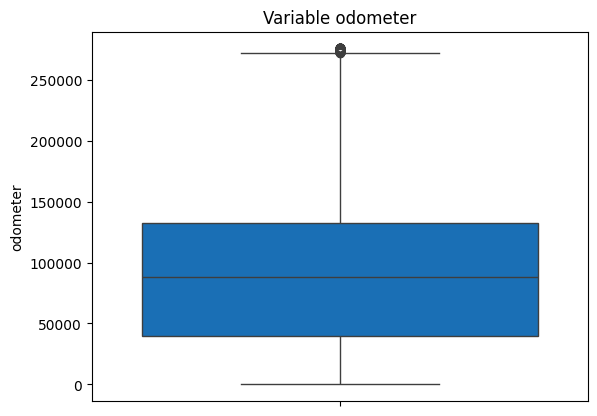

In [26]:
fig, ax = plt.subplots()
ax.set_title('Variable odometer')
valores = sns.boxplot(cars_df['odometer'], color='#0071CF');

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [27]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [28]:
x = cars_df.drop(columns=['region','region_url','year','manufacturer','model','fuel','title_status','transmission','state'])
y = cars_df.iloc[:,8]

In [29]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

1.0

In [31]:
np.mean(cross_val_score(lr,x,y,scoring ='r2'))

1.0

In [32]:
%matplotlib inline

In [33]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = pd.DataFrame(scalar.fit_transform(x_train) , columns=x_train.columns)
x_test_scaled = pd.DataFrame(scalar.transform(x_test),columns=x_test.columns)

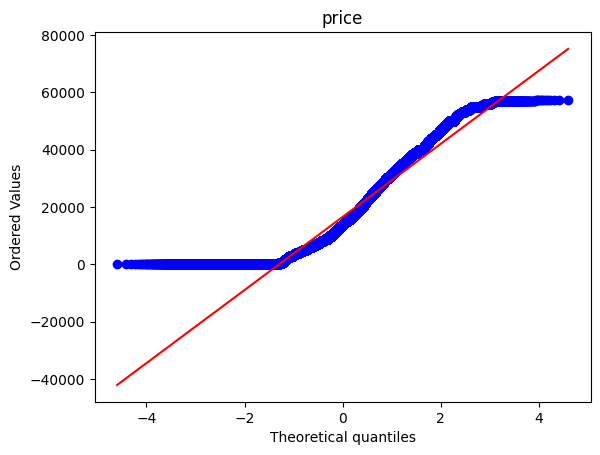

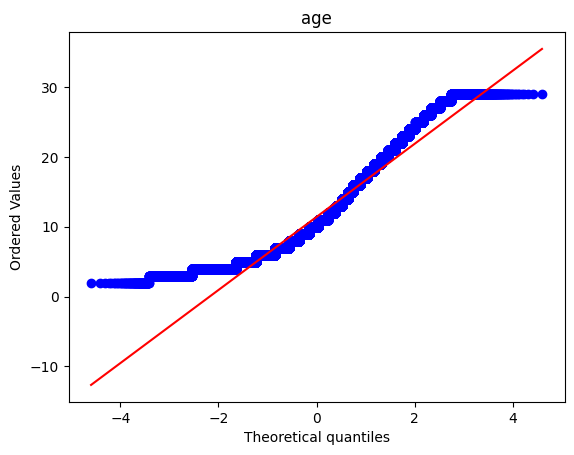

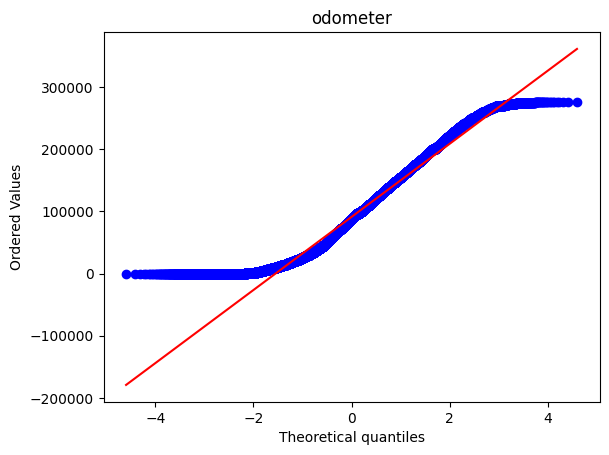

In [34]:
for col in x_train_scaled.columns:
  stats.probplot(x_train[col], dist = 'norm', plot = plt)
  plt.title(col)
  plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [35]:
# aplico la transformación con el metodo yeo-johnson
pt = PowerTransformer()
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.transform(x_test)

lr1 = LinearRegression()
lr1.fit(x_train_transformed,y_train)
y_pred = lr1.predict(x_test_transformed)
print(r2_score(y_test, y_pred))
pd.DataFrame({'cols':x_train.columns , 'yeo-johnson': pt.lambdas_})

0.9503716953017233


,cols,yeo-johnson
0,price,0.415232
1,age,0.019296
2,odometer,0.531308


In [36]:
pt = PowerTransformer()
x_transformed = pt.fit_transform(x)
np.mean(cross_val_score(lr1, x_transformed, y, scoring='r2'))

0.9498383002016126

In [37]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns = x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns = x_test.columns)

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

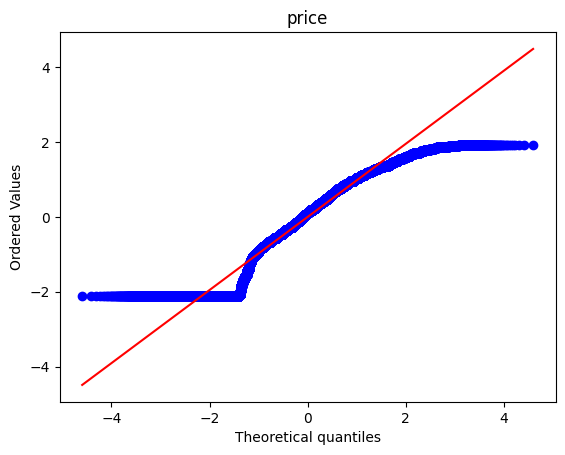

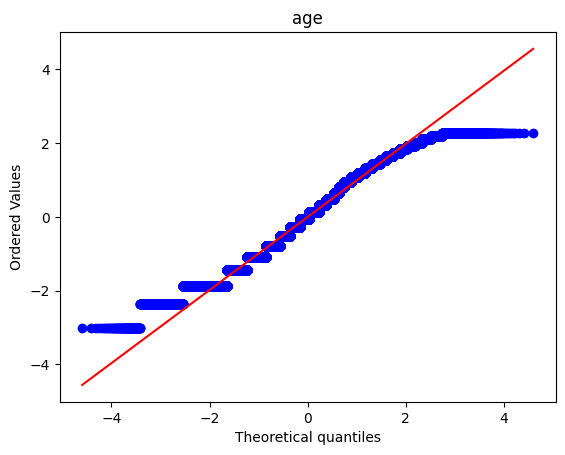

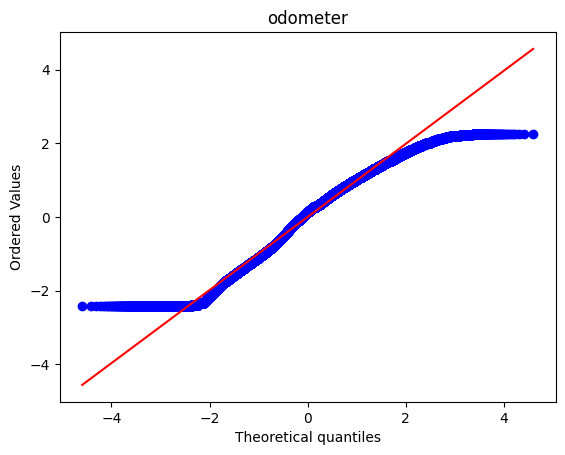

In [38]:
for col in x_train_transformed.columns:
  stats.probplot(x_train_transformed[col], plot = plt)
  plt.title(col)
  plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [211]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(cars_df[['price','age','odometer']])
transf_df = std_scale.transform(cars_df[['price','age','odometer']])
minmax_df = transf_df.copy()
minmax_scale = preprocessing.MinMaxScaler().fit(cars_df[['price','age','odometer']])
minmax_df = pd.DataFrame(minmax_scale.fit_transform(cars_df[['price','age','odometer']]))

In [212]:
print('media despues de la estandirazacion:\nprice={:.2f}, age={:.2f}, odometer={:.2f}'
      .format(transf_df[:,0].mean(), transf_df[:,1].mean(), transf_df[:,2].mean()))
print('\ndesviacion estandar despues de la estandarizacion:\nprice={:.2f}, age={:.2f}, odometer={:.2f}'
      .format(transf_df[:,0].std(), transf_df[:,1].std(), transf_df[:,2].std()))

media despues de la estandirazacion:
price=-0.00, age=0.00, odometer=-0.00

desviacion estandar despues de la estandarizacion:
price=1.00, age=1.00, odometer=1.00


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

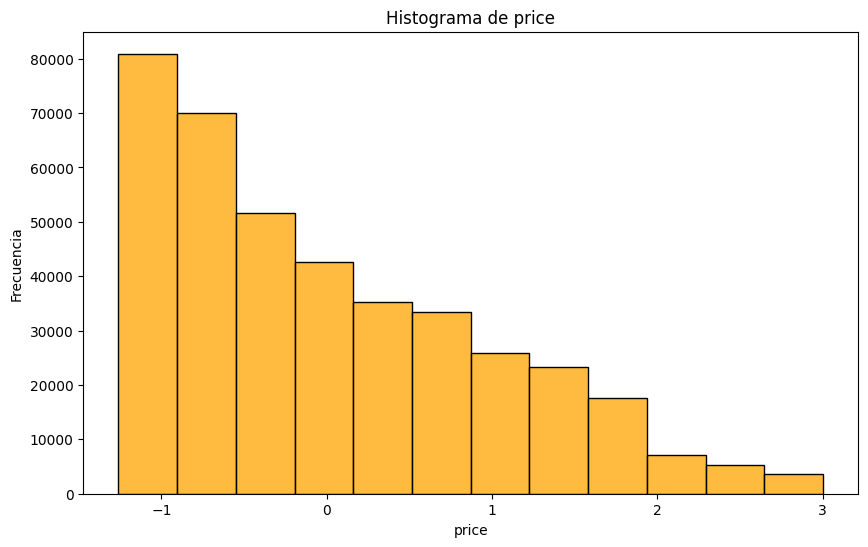

In [218]:
plt.figure(figsize=(10, 6))
sns.histplot(transf_df[:,0], bins=12, color='orange')
plt.title('Histograma de price')
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.show()

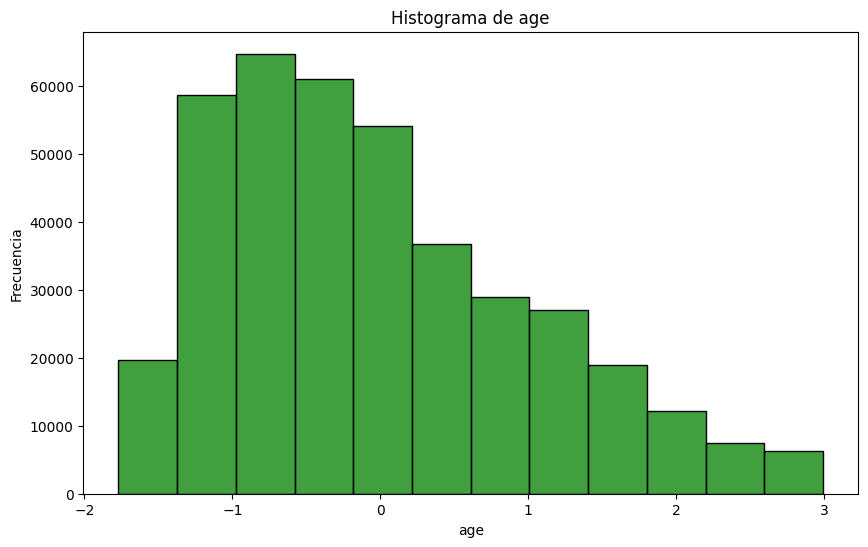

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(transf_df[:,1], bins=12, color='green')
plt.title('Histograma de age')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.show()

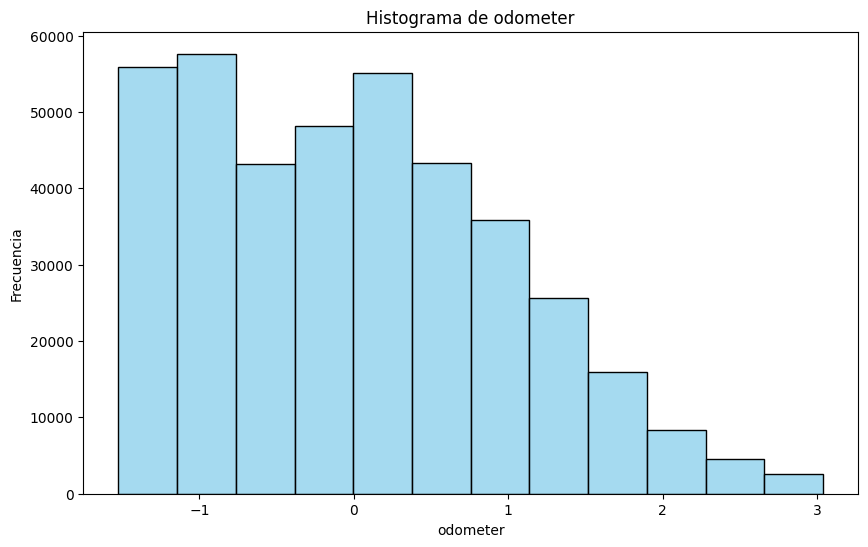

In [220]:
plt.figure(figsize=(10, 6))
sns.histplot(transf_df[:,2], bins=12, color='skyblue')
plt.title('Histograma de odometer')
plt.xlabel('odometer')
plt.ylabel('Frecuencia')
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [45]:
cars_df.describe(include = 'object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,state
count,399472,399472,399472,399472,399472,399472,399472,399472
unique,404,413,41,25098,5,6,3,51
top,columbus,https://washingtondc.craigslist.org,ford,f-150,gas,clean,automatic,ca
freq,3425,2889,78525,11365,339267,387082,319431,46977


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [86]:
highly_cardinal_variables = cars_df.describe(include ='object').T[cars_df.describe(include='object').T['unique'] > 52].index.to_list()
few_cardinal_variables = cars_df.describe(include = 'object').T[cars_df.describe(include='object').T['unique'] <= 52].index.to_list()
print("variables categoricas con alta cardinalidad:",highly_cardinal_variables)
print("variables categoricas con baja cardinalidad:",few_cardinal_variables)

variables categoricas con alta cardinalidad: ['region', 'region_url', 'model']
variables categoricas con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

Text(0.5, 1.0, 'Cardinality')

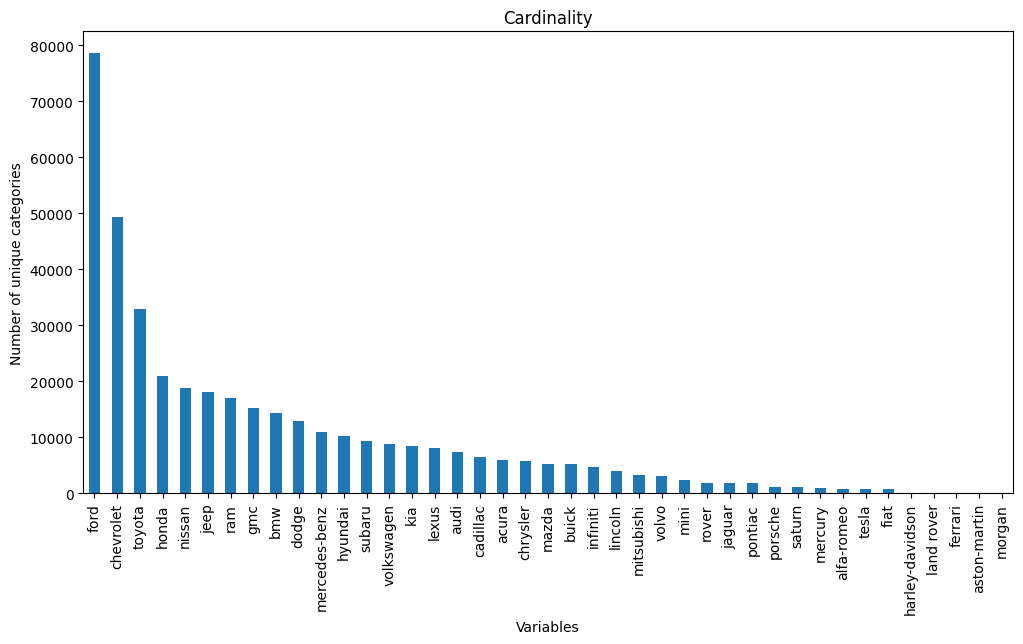

In [80]:
cars_df['manufacturer'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Text(0.5, 1.0, 'Cardinality')

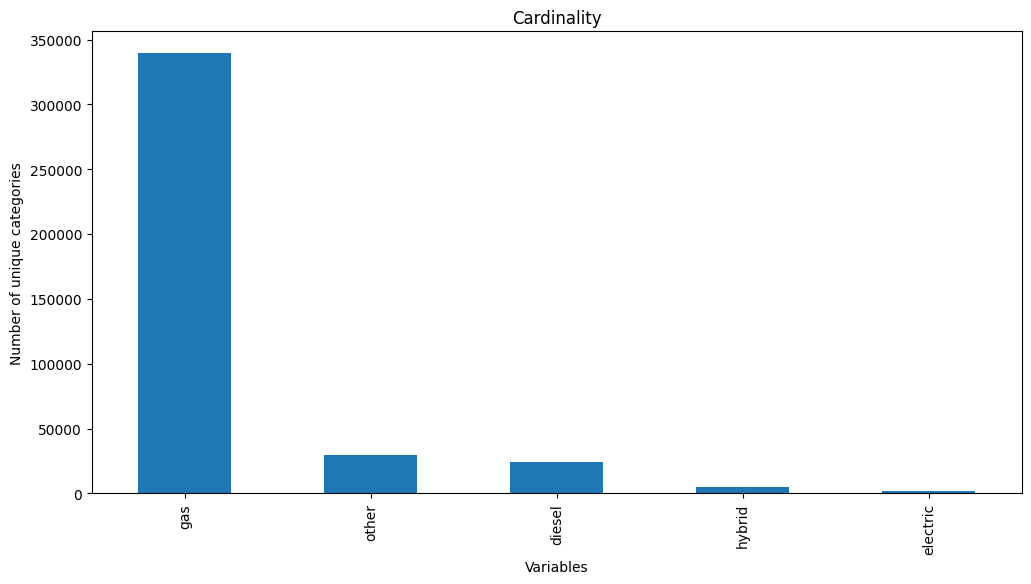

In [81]:
cars_df['fuel'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Text(0.5, 1.0, 'Cardinality')

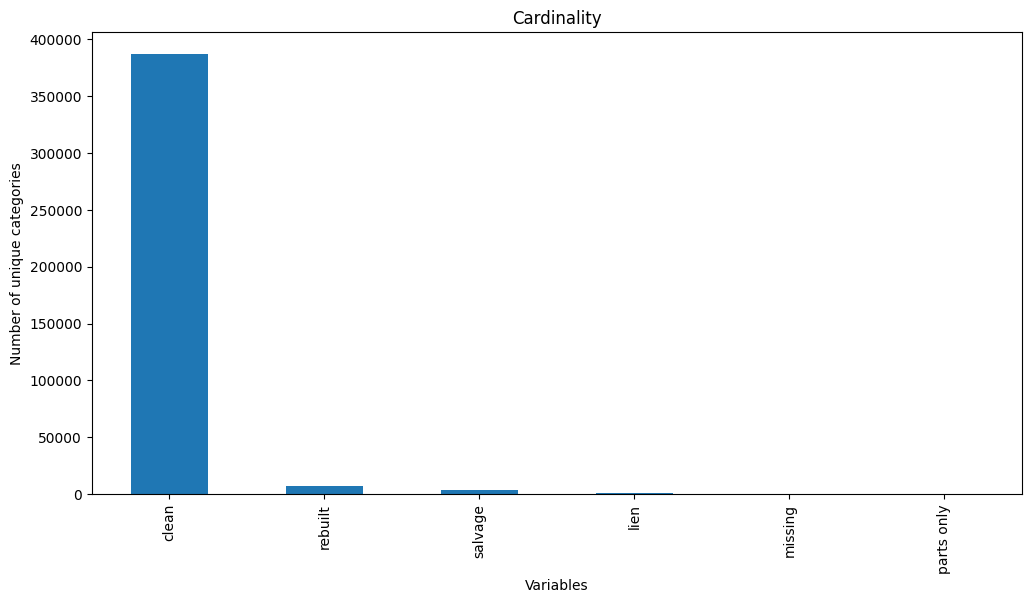

In [82]:
cars_df['title_status'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Text(0.5, 1.0, 'Cardinality')

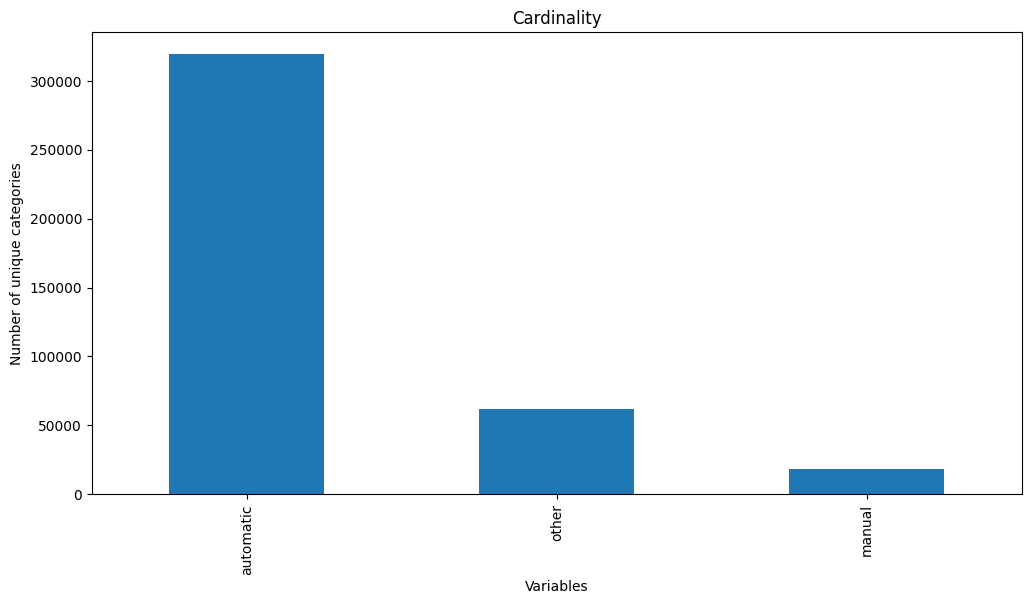

In [83]:
cars_df['transmission'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Text(0.5, 1.0, 'Cardinality')

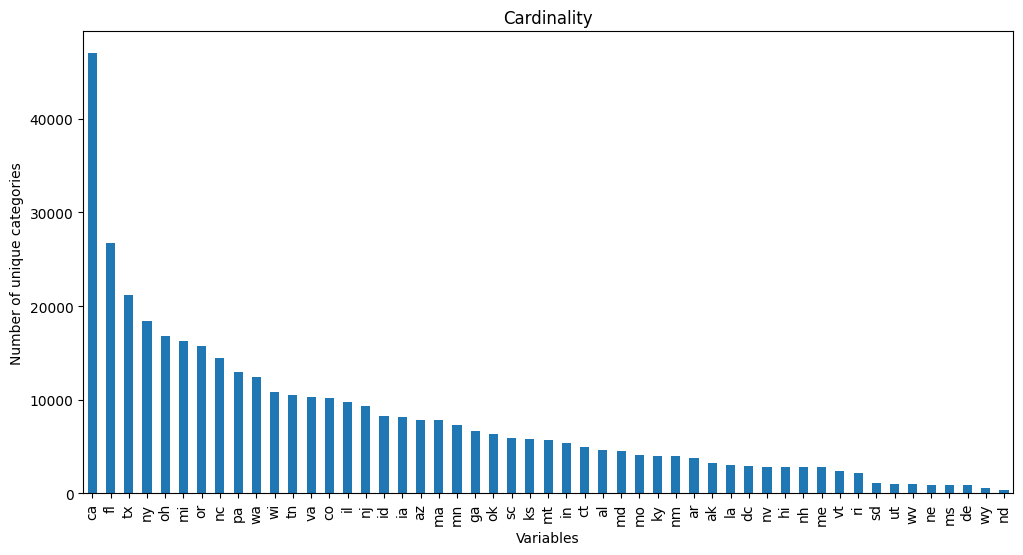

In [84]:
cars_df['state'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [102]:
from sklearn.preprocessing import OneHotEncoder
onehot_df = pd.get_dummies(few_cardinal_variables, drop_first=True)
onehot_df.head()

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [104]:
binary_df = pd.get_dummies(highly_cardinal_variables)
binary_df.head()

,model,region,region_url
0,0,1,0
1,0,0,1
2,1,0,0


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [216]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)
cadena = pd.concat([minmax_df,onehot_df,binary_df], axis=1)
cadena.head()

,0,1,2,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,model,region,region_url
0,0.107143,0.430592,0.361069,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,0.212500,0.430592,0.361069,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,0.375000,0.430592,0.361069,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
3,0.026786,0.430592,0.361069,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,0.087500,0.430592,0.361069,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
